In [1]:
using BSON
using Flux
using Plots

In [2]:
include("ActiveLearning.jl")
include("DataSets.jl")
using .ActiveLearning
using .DataSets

In [3]:
X_mnist_train, y_mnist_train, X_mnist_test, y_mnist_test = prepare_mnist(get_mnist("data/mnist"))
size(X_mnist_train), size(X_mnist_test)

((32, 32, 1, 60000), (32, 32, 1, 10000))

In [4]:
rounds_random, accuracies_random = active_learning(
    random_sampling, BSON.load("lenet.bson")[:model],
    X_mnist_train, y_mnist_train,
    X_mnist_test, y_mnist_test)

┌ Warning: Number of observations less than batchsize, decreasing the batchsize to 10
└ @ Flux.Data /home/podszond/.julia/packages/Flux/BPPNj/src/data/dataloader.jl:82
┌ Warning: Number of observations less than batchsize, decreasing the batchsize to 20
└ @ Flux.Data /home/podszond/.julia/packages/Flux/BPPNj/src/data/dataloader.jl:82
┌ Warning: Number of observations less than batchsize, decreasing the batchsize to 30
└ @ Flux.Data /home/podszond/.julia/packages/Flux/BPPNj/src/data/dataloader.jl:82
┌ Warning: Number of observations less than batchsize, decreasing the batchsize to 40
└ @ Flux.Data /home/podszond/.julia/packages/Flux/BPPNj/src/data/dataloader.jl:82
┌ Warning: Number of observations less than batchsize, decreasing the batchsize to 50
└ @ Flux.Data /home/podszond/.julia/packages/Flux/BPPNj/src/data/dataloader.jl:82
┌ Warning: Number of observations less than batchsize, decreasing the batchsize to 60
└ @ Flux.Data /home/podszond/.julia/packages/Flux/BPPNj/src/data/dataloade

(0:30, [0.6352, 0.677, 0.7139, 0.7984, 0.8422, 0.8514, 0.9001, 0.9026, 0.9047, 0.9113  …  0.9551, 0.954, 0.9535, 0.9585, 0.9574, 0.9612, 0.963, 0.9614, 0.9611, 0.9644])

In [5]:
rounds_entropy, accuracies_entropy = active_learning(
    entropy_sampling, BSON.load("lenet.bson")[:model],
    X_mnist_train, y_mnist_train,
    X_mnist_test, y_mnist_test)

┌ Warning: Number of observations less than batchsize, decreasing the batchsize to 10
└ @ Flux.Data /home/podszond/.julia/packages/Flux/BPPNj/src/data/dataloader.jl:82
┌ Warning: Number of observations less than batchsize, decreasing the batchsize to 20
└ @ Flux.Data /home/podszond/.julia/packages/Flux/BPPNj/src/data/dataloader.jl:82
┌ Warning: Number of observations less than batchsize, decreasing the batchsize to 30
└ @ Flux.Data /home/podszond/.julia/packages/Flux/BPPNj/src/data/dataloader.jl:82
┌ Warning: Number of observations less than batchsize, decreasing the batchsize to 40
└ @ Flux.Data /home/podszond/.julia/packages/Flux/BPPNj/src/data/dataloader.jl:82
┌ Warning: Number of observations less than batchsize, decreasing the batchsize to 50
└ @ Flux.Data /home/podszond/.julia/packages/Flux/BPPNj/src/data/dataloader.jl:82
┌ Warning: Number of observations less than batchsize, decreasing the batchsize to 60
└ @ Flux.Data /home/podszond/.julia/packages/Flux/BPPNj/src/data/dataloade

(0:30, [0.6352, 0.6948, 0.72, 0.749, 0.7966, 0.8429, 0.8635, 0.9025, 0.9204, 0.9067  …  0.9677, 0.9703, 0.9696, 0.9728, 0.9756, 0.9752, 0.9771, 0.9763, 0.9764, 0.9782])

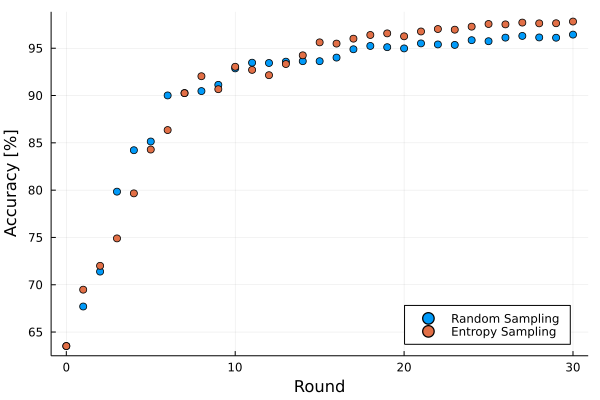

In [6]:
scatter(rounds_random, 100 .* accuracies_random, label="Random Sampling",
    legend_position=:bottomright, xlabel="Round", ylabel="Accuracy [%]")
scatter!(rounds_entropy, 100 .* accuracies_entropy, label="Entropy Sampling")